# Comprehensive Discussion on Monte Carlo Localization
- Monte Carlo Localization (MCL) is a widely used probabilistic approach to solving the localization problem in robotics.
It builds upon concepts like particle filters and Bayesian estimation, extending their functionality into the realm of 2D space localization.

- This lecture discusses MCL step-by-step, starting from a recap of the 1D localization problem and progressing into 2D localization with detailed considerations for system dynamics, prediction, correction, and implementation. Below, I will break this into sections for clarity.



# 1. Recap: 1D Robot Localization


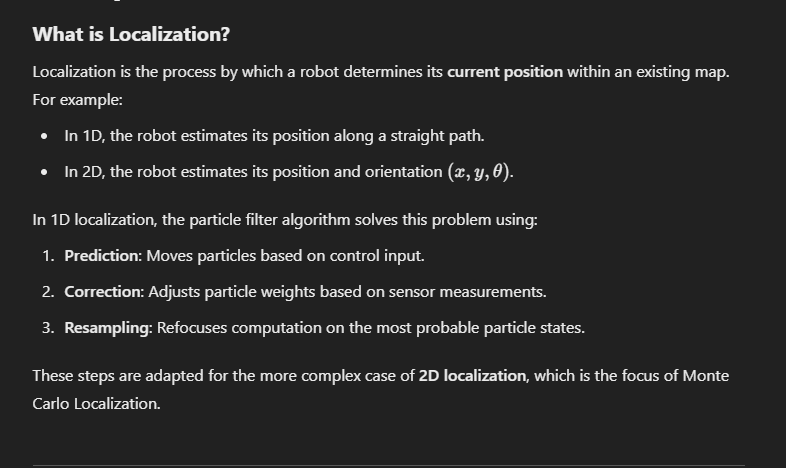

# 2. What is Monte Carlo Localization (MCL)?


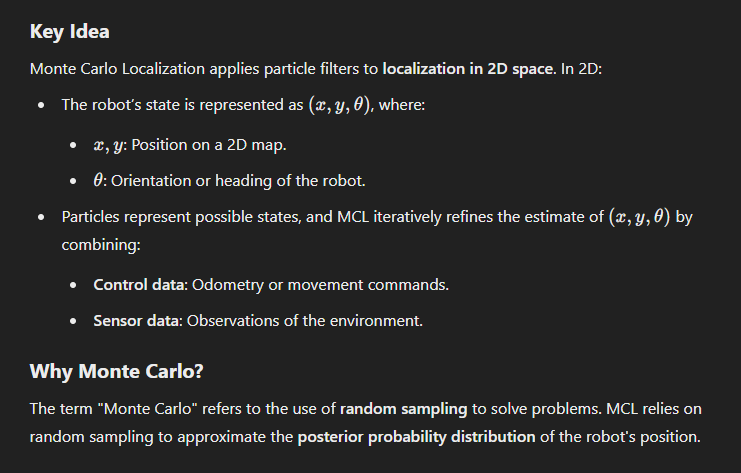

# 3. Updating Models for 2D Localization


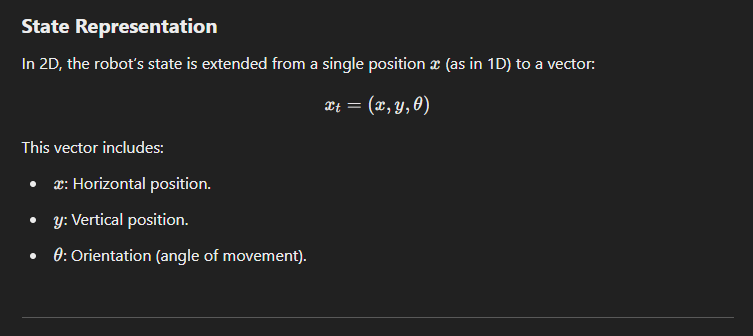

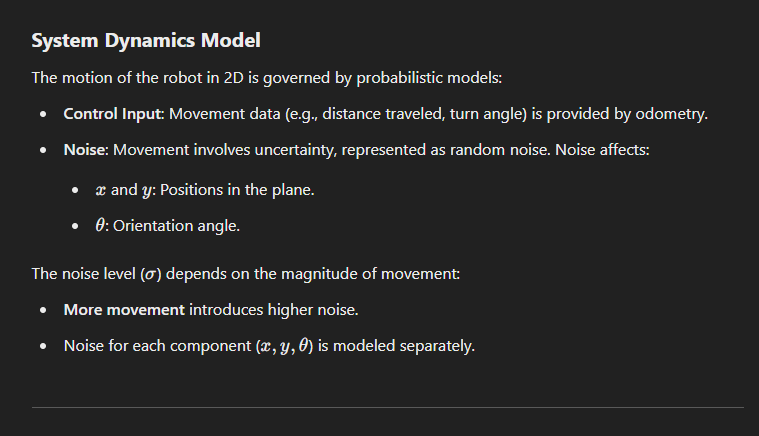

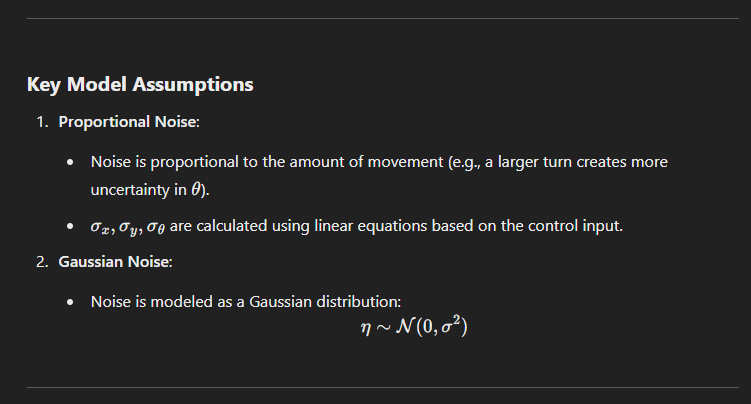

# 4. Prediction in 2D Space
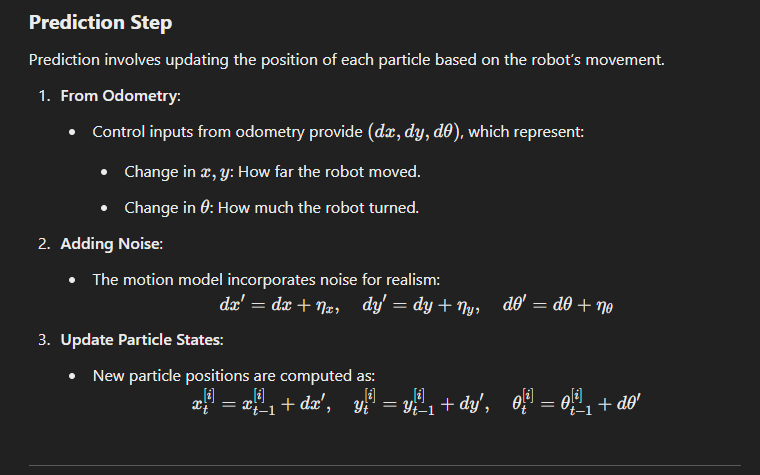

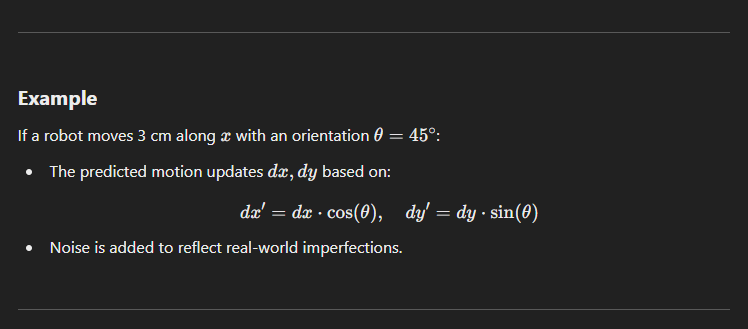

# 5. Correction in 2D Space


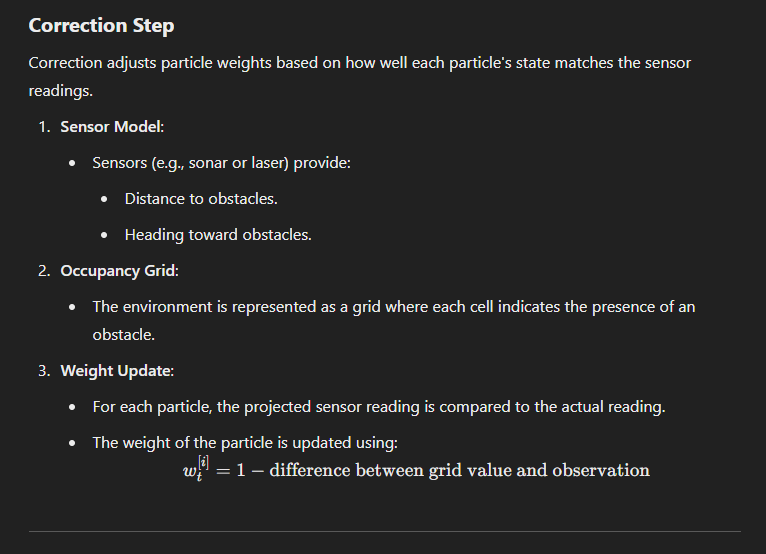

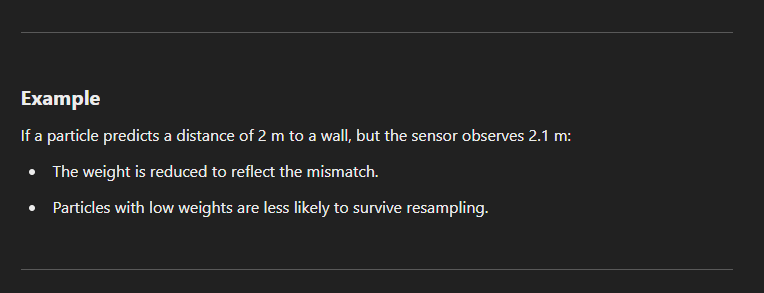

# 6. Implementation Tips and Tricks


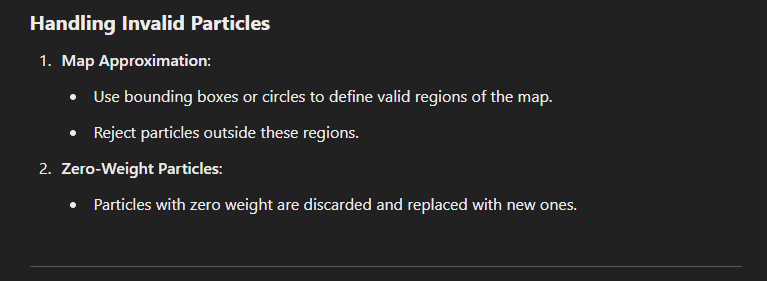

# 8. Advanced System Dynamics in MCL


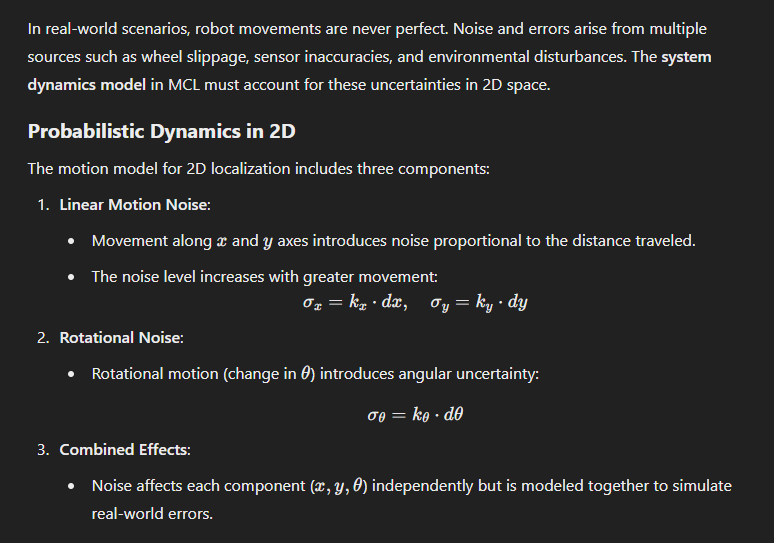

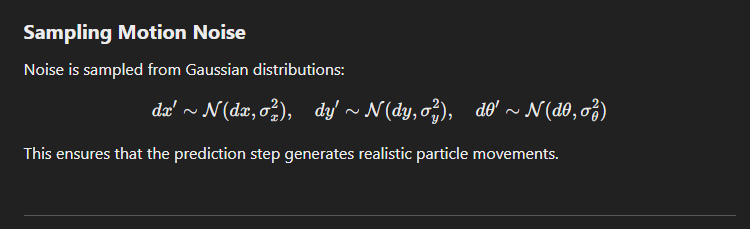

# 9. Monte Carlo Localization: Prediction Phase



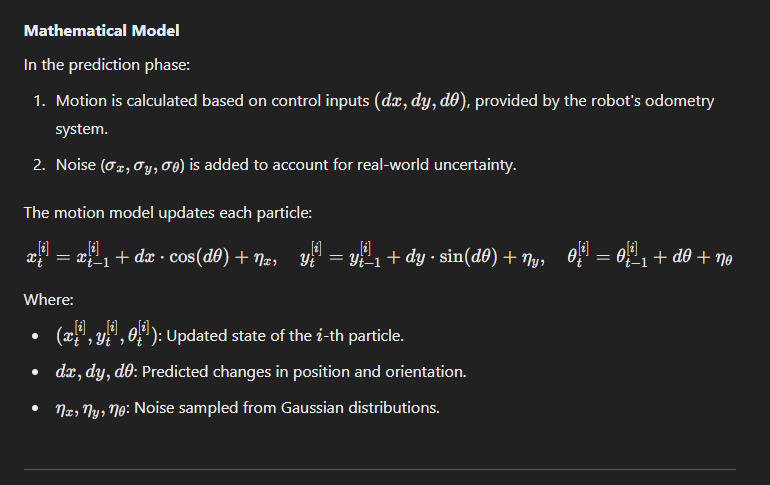

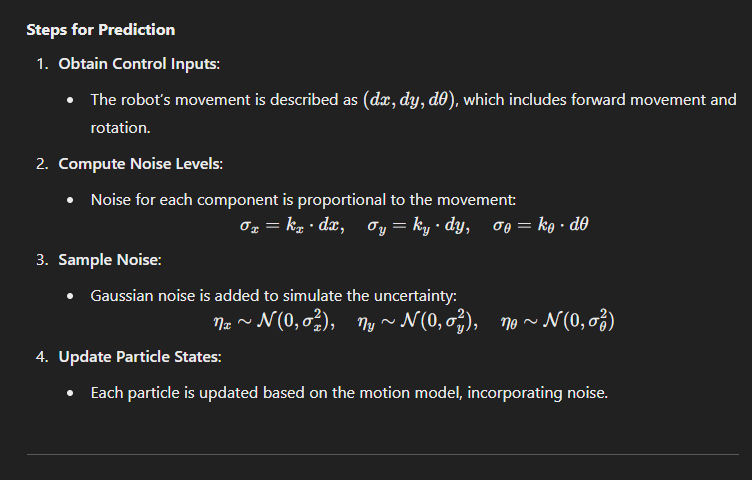

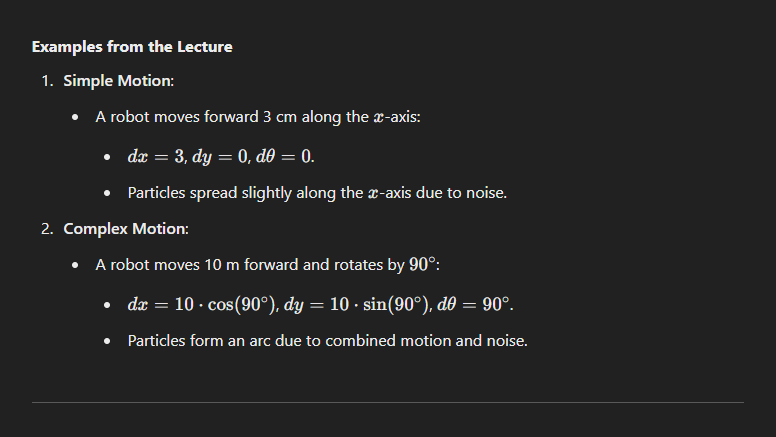

# 10. Monte Carlo Localization: Correction Phase



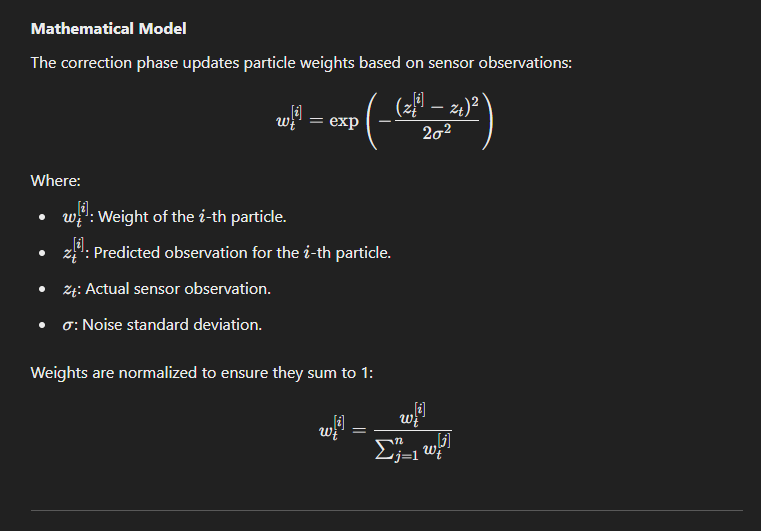

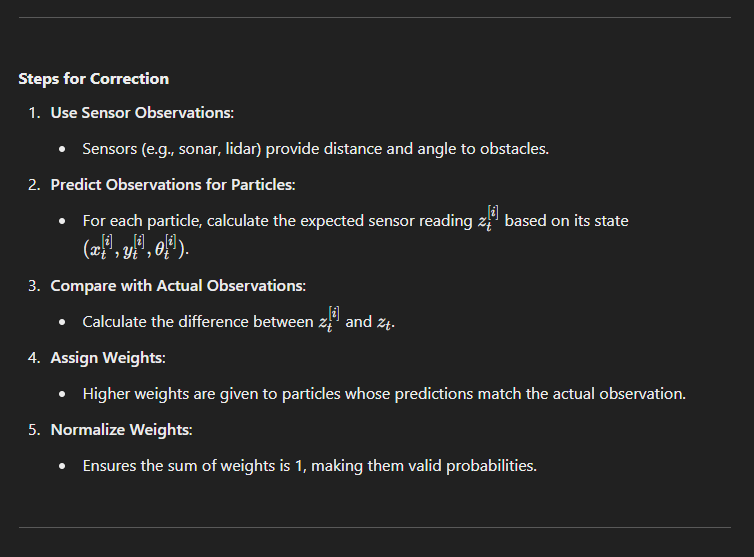

# 11. Implementation Challenges


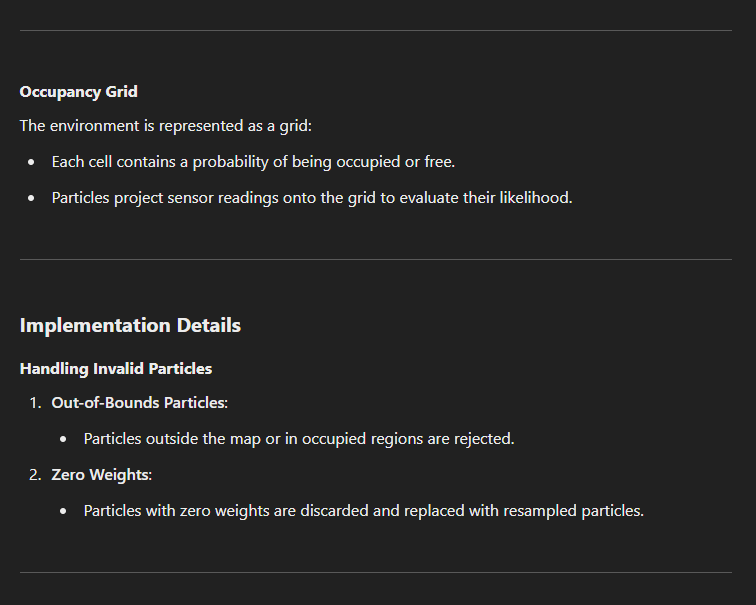

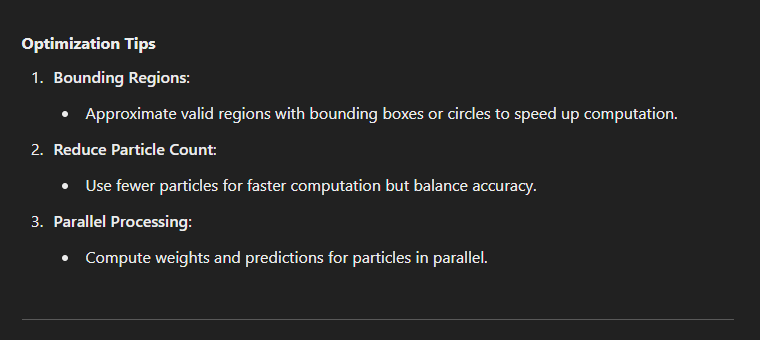

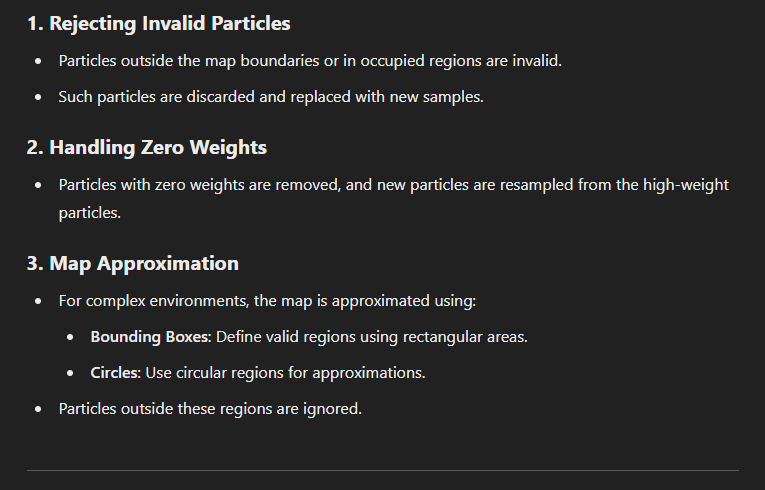

# 12. Real-World Examples


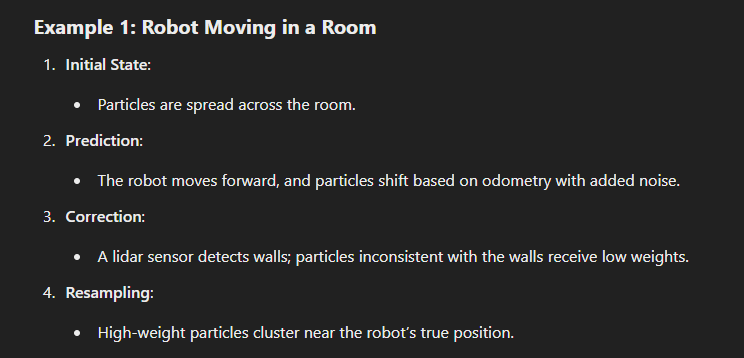

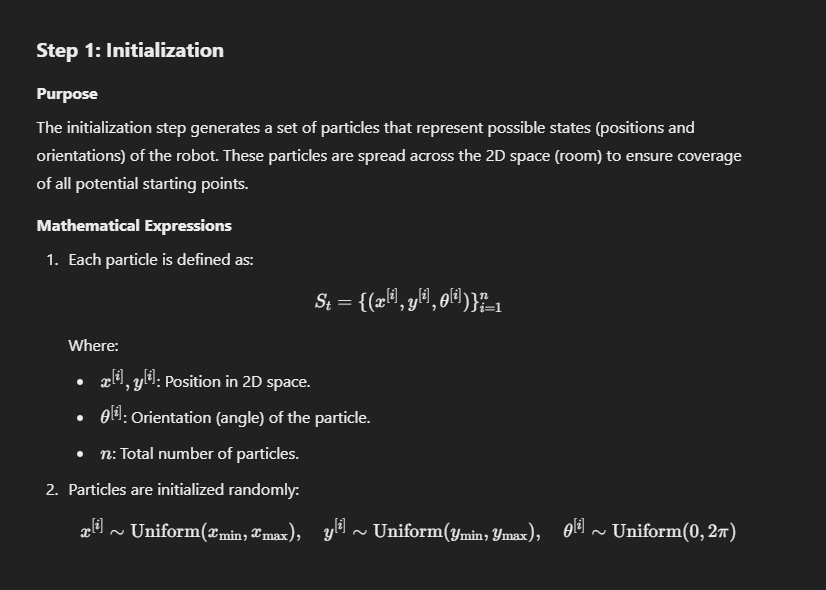

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Room dimensions and number of particles
n_particles = 500
room_x, room_y = 10, 10

# Initialize particles randomly in the room
particles = np.zeros((n_particles, 3))
particles[:, 0] = np.random.uniform(0, room_x, n_particles)  # x
particles[:, 1] = np.random.uniform(0, room_y, n_particles)  # y
particles[:, 2] = np.random.uniform(0, 2 * np.pi, n_particles)  # theta


### Visualization

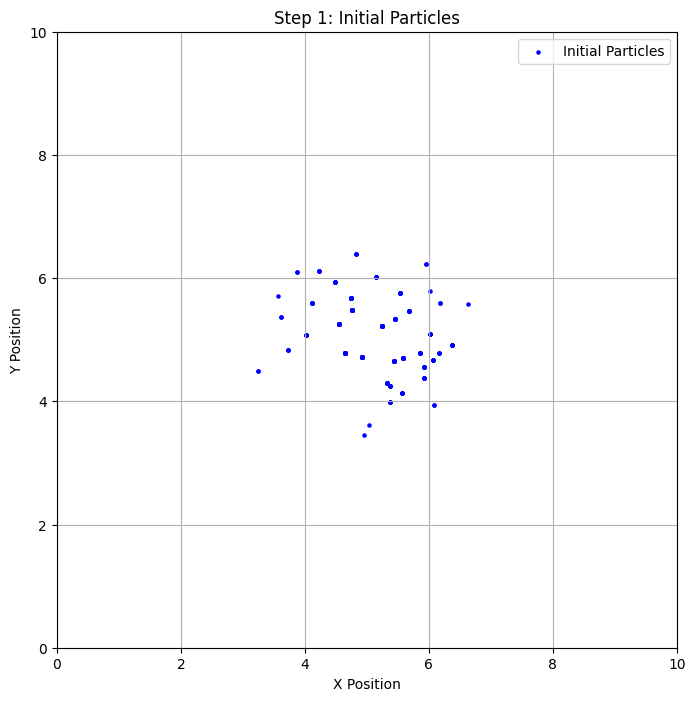

In [7]:
# Visualization: Initial particles
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=5, label="Initial Particles", color="blue")
plt.title("Step 1: Initial Particles")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()


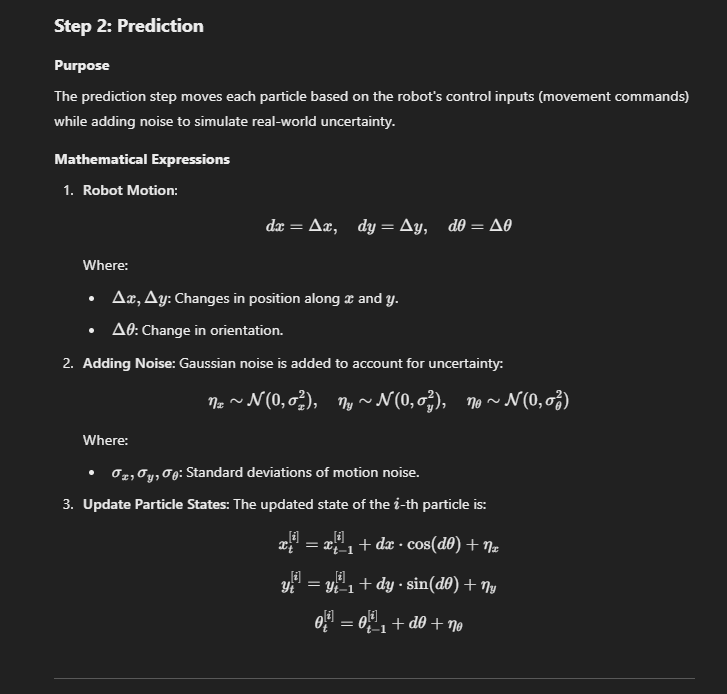

In [3]:
# Define robot motion and noise
dx, dy, dtheta = 1.0, 0.5, np.pi / 18  # Move forward, slight turn
motion_noise_std = [0.1, 0.1, 0.05]  # Noise for x, y, theta

# Move particles based on motion model
def move_particles(particles, dx, dy, dtheta, noise_std):
    noise = np.random.normal(0, noise_std, (particles.shape[0], 3))
    particles[:, 0] += dx + noise[:, 0]  # x + noise
    particles[:, 1] += dy + noise[:, 1]  # y + noise
    particles[:, 2] += dtheta + noise[:, 2]  # theta + noise
    particles[:, 2] %= 2 * np.pi  # Keep theta in [0, 2π]
    return particles

particles = move_particles(particles, dx, dy, dtheta, motion_noise_std)


### Visualization

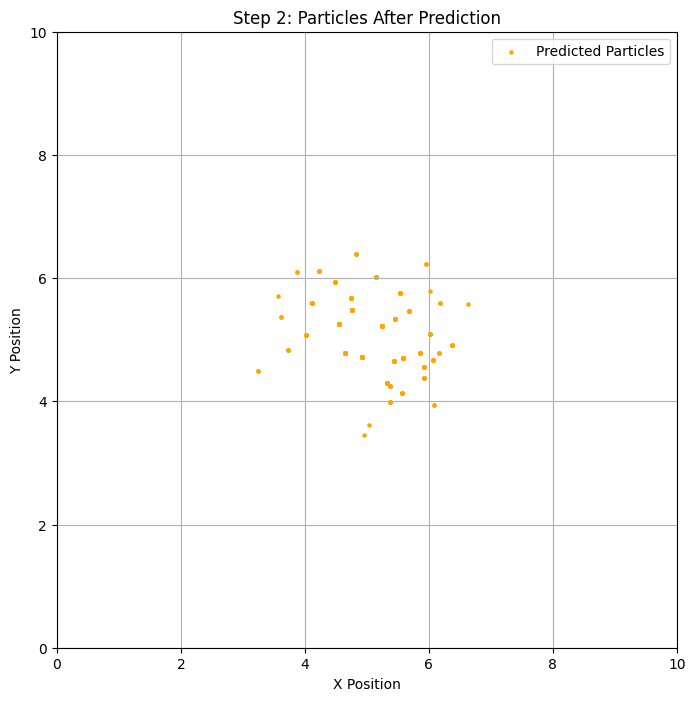

In [8]:
# Visualization: Predicted particles
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=5, label="Predicted Particles", color="orange")
plt.title("Step 2: Particles After Prediction")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()


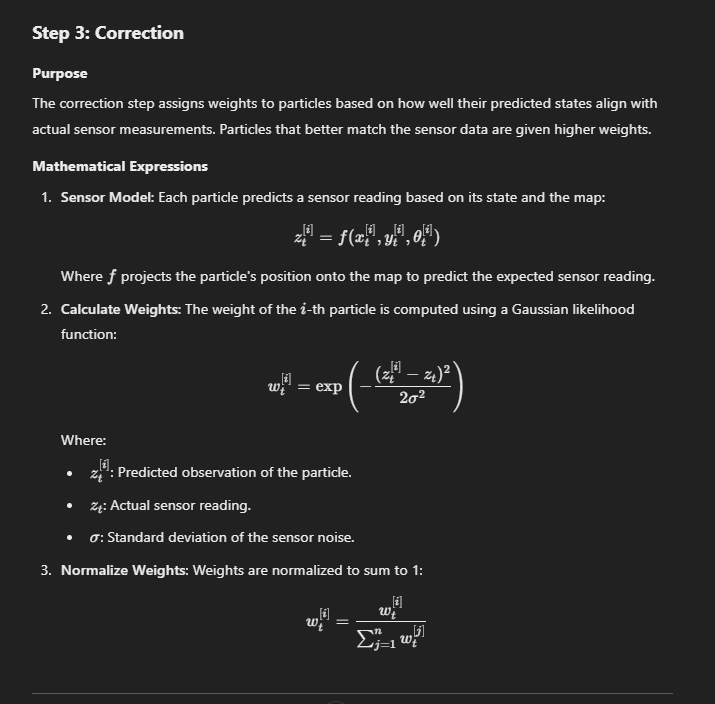

In [4]:
# Simulate sensor data and calculate weights
sensor_reading = [5, 5]  # Lidar reports distance to walls
sensor_noise_std = 0.5  # Sensor noise

def calculate_weights(particles, sensor_reading, sensor_std):
    distances = np.sqrt((particles[:, 0] - sensor_reading[0])**2 + (particles[:, 1] - sensor_reading[1])**2)
    weights = np.exp(-0.5 * (distances / sensor_std)**2)  # Gaussian likelihood
    weights /= np.sum(weights)  # Normalize
    return weights

weights = calculate_weights(particles, sensor_reading, sensor_noise_std)


### Visualization

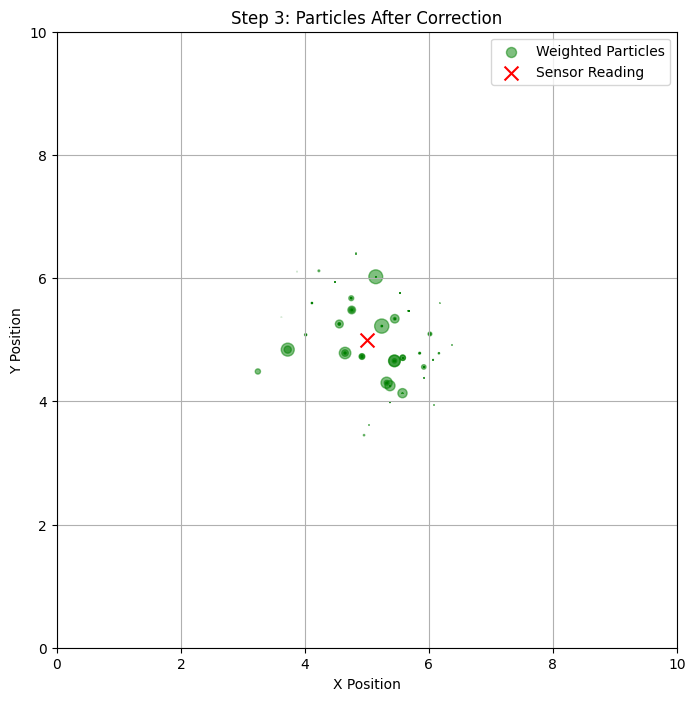

In [9]:
# Visualization: Corrected particles with weights
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=weights * 1000, label="Weighted Particles", alpha=0.5, color="green")
plt.scatter(sensor_reading[0], sensor_reading[1], c="red", label="Sensor Reading", marker="x", s=100)
plt.title("Step 3: Particles After Correction")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()


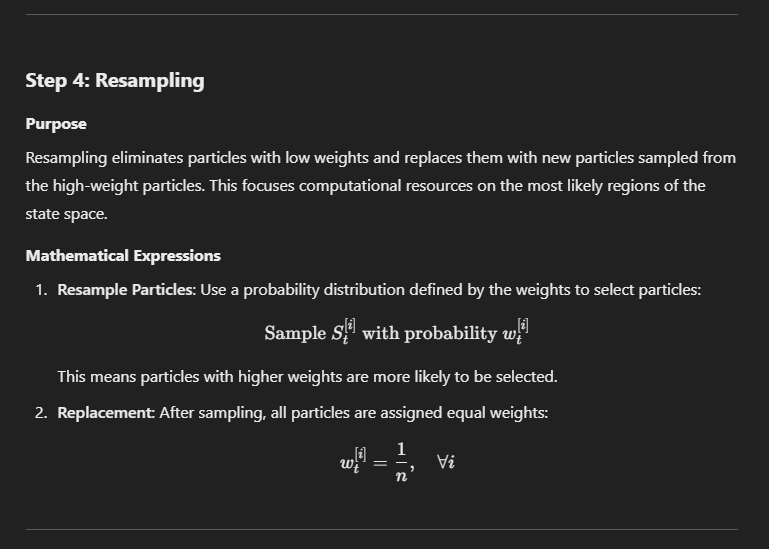

In [5]:
# Resample particles based on their weights
def resample_particles(particles, weights):
    indices = np.random.choice(range(particles.shape[0]), size=particles.shape[0], p=weights)
    resampled_particles = particles[indices]
    return resampled_particles

particles = resample_particles(particles, weights)


### Visualization

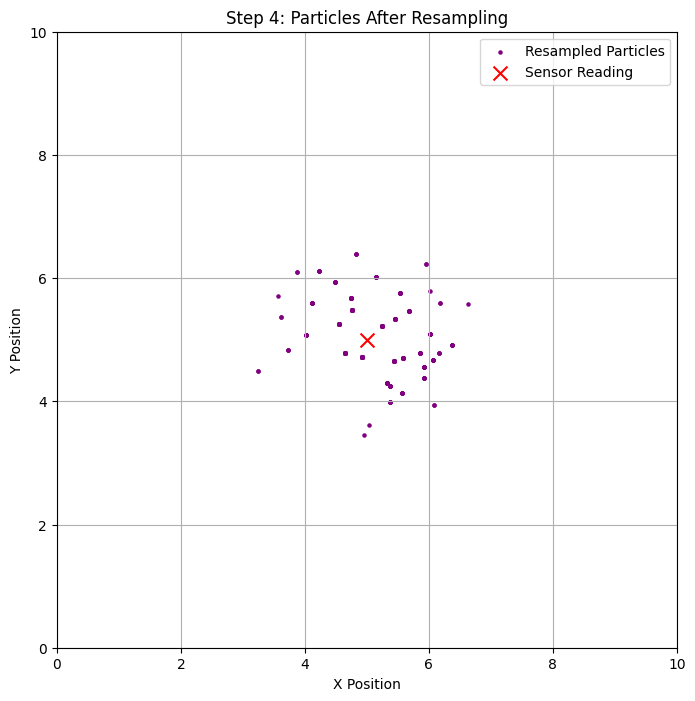

In [10]:
# Visualization: Resampled particles
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=5, label="Resampled Particles", color="purple")
plt.scatter(sensor_reading[0], sensor_reading[1], c="red", label="Sensor Reading", marker="x", s=100)
plt.title("Step 4: Particles After Resampling")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()


# Monte Carlo Localization Simulation Code


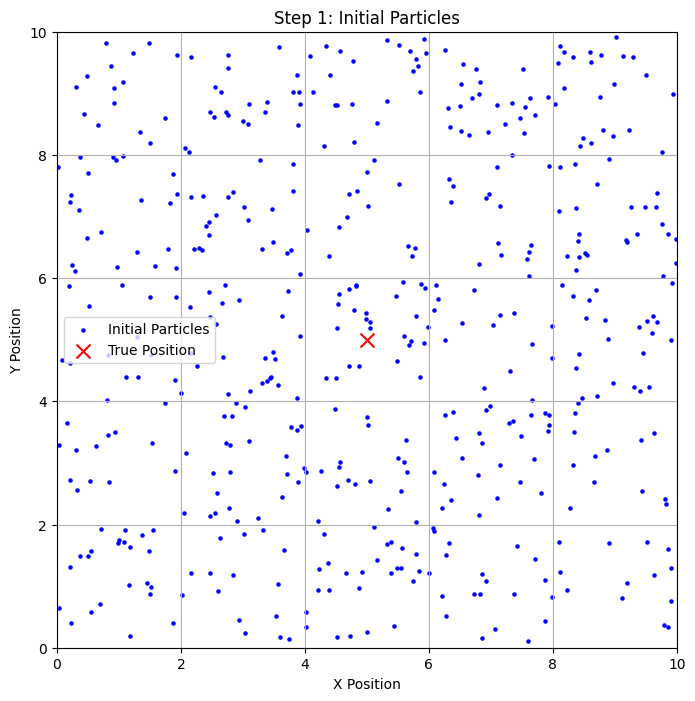

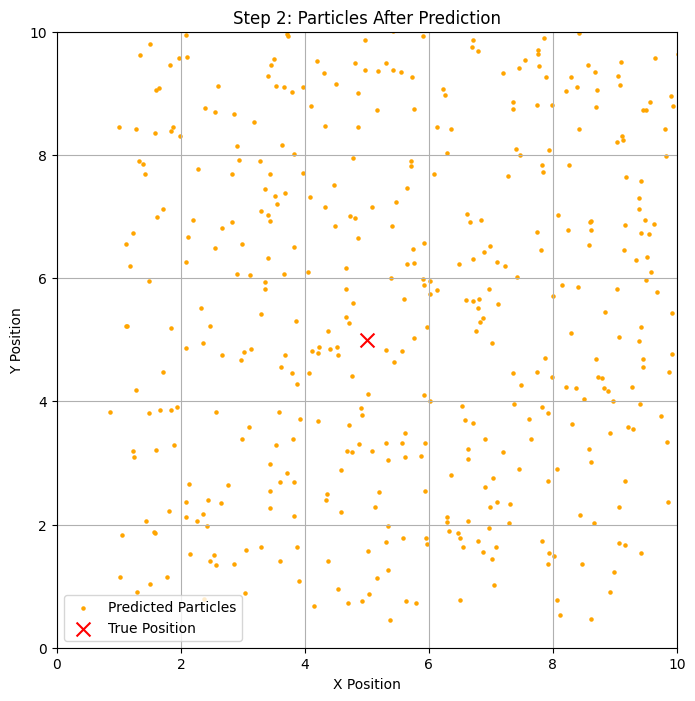

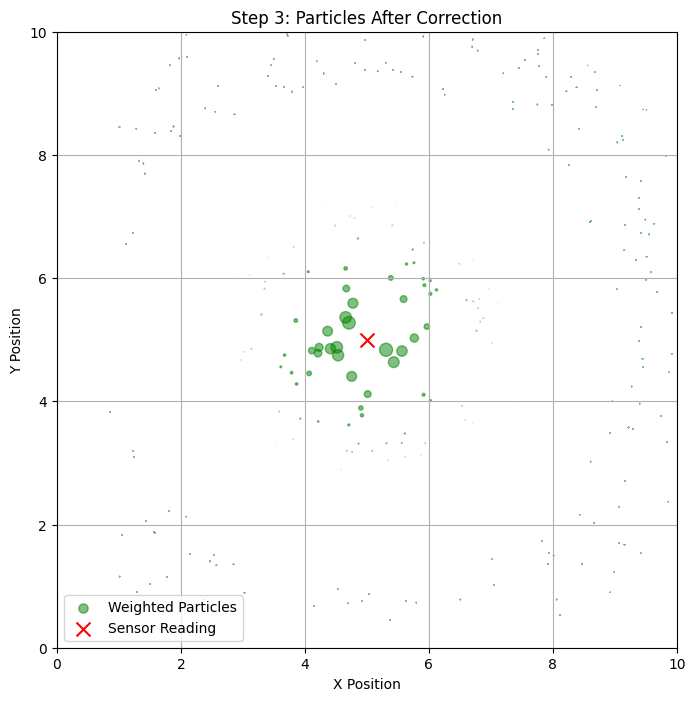

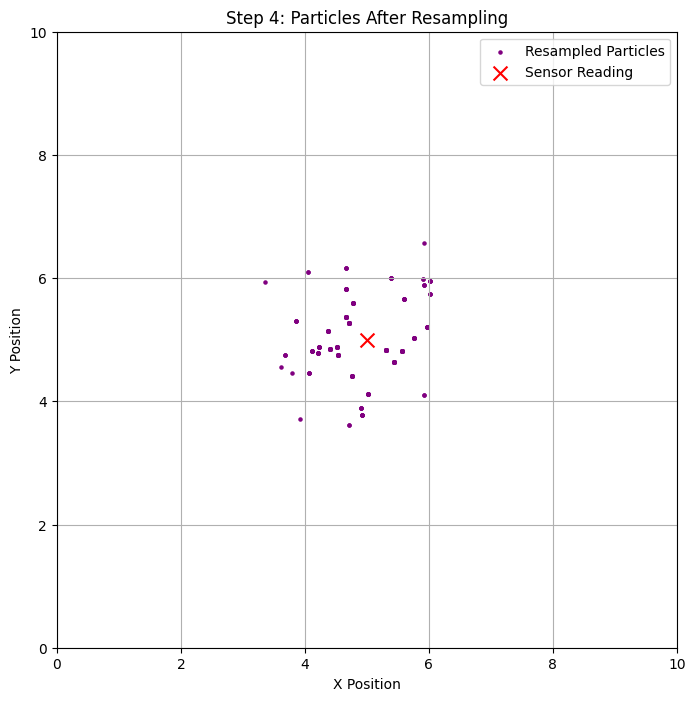

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Number of particles
n_particles = 500

# Room dimensions
room_x, room_y = 10, 10

# Initialize particles randomly in the room
particles = np.zeros((n_particles, 3))  # [x, y, theta]
particles[:, 0] = np.random.uniform(0, room_x, n_particles)  # x
particles[:, 1] = np.random.uniform(0, room_y, n_particles)  # y
particles[:, 2] = np.random.uniform(0, 2 * np.pi, n_particles)  # theta

# Robot's true position (ground truth)
true_position = [5, 5, 0]  # [x, y, theta]

# Visualization: Initial particles
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=5, label="Initial Particles", color="blue")
plt.scatter(true_position[0], true_position[1], c="red", label="True Position", marker="x", s=100)
plt.title("Step 1: Initial Particles")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()

# Step 2: Prediction function
def move_particles(particles, dx, dy, dtheta, noise_std):
    noise = np.random.normal(0, noise_std, (particles.shape[0], 3))  # Noise for [x, y, theta]
    particles[:, 0] += dx + noise[:, 0]  # x + motion + noise
    particles[:, 1] += dy + noise[:, 1]  # y + motion + noise
    particles[:, 2] += dtheta + noise[:, 2]  # theta + motion + noise
    particles[:, 2] %= 2 * np.pi  # Keep theta in [0, 2π]
    return particles

# Simulate robot motion: move 1 unit forward and turn slightly
dx, dy, dtheta = 1.0, 0.5, np.pi / 18  # Robot movement
motion_noise_std = [0.1, 0.1, 0.05]  # Motion noise

# Update particles with predicted motion
particles = move_particles(particles, dx, dy, dtheta, motion_noise_std)

# Visualization: Predicted particles
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=5, label="Predicted Particles", color="orange")
plt.scatter(true_position[0], true_position[1], c="red", label="True Position", marker="x", s=100)
plt.title("Step 2: Particles After Prediction")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()

def calculate_weights(particles, sensor_reading, sensor_std):
    distances = np.sqrt((particles[:, 0] - sensor_reading[0])**2 + (particles[:, 1] - sensor_reading[1])**2)
    weights = np.exp(-0.5 * (distances / sensor_std)**2)  # Gaussian likelihood
    total_weight = np.sum(weights)
    if total_weight == 0:  # Prevent division by zero
        weights = np.ones_like(weights) / len(weights)  # Assign equal weights
    else:
        weights /= total_weight  # Normalize weights
    return weights

# Simulated sensor data: Distance to walls
sensor_reading = [5, 5]  # Sensor detects equal distance to walls
sensor_noise_std = 0.5  # Sensor noise

# Calculate particle weights
weights = calculate_weights(particles, sensor_reading, sensor_noise_std)

# Visualization: Corrected particles with weights
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=weights * 1000, label="Weighted Particles", alpha=0.5, color="green")
plt.scatter(sensor_reading[0], sensor_reading[1], c="red", label="Sensor Reading", marker="x", s=100)
plt.title("Step 3: Particles After Correction")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()

# Step 4: Resampling function
def resample_particles(particles, weights):
    indices = np.random.choice(range(particles.shape[0]), size=particles.shape[0], p=weights)
    resampled_particles = particles[indices]
    return resampled_particles

# Resample particles based on weights
particles = resample_particles(particles, weights)

# Visualization: Resampled particles
plt.figure(figsize=(8, 8))
plt.scatter(particles[:, 0], particles[:, 1], s=5, label="Resampled Particles", color="purple")
plt.scatter(sensor_reading[0], sensor_reading[1], c="red", label="Sensor Reading", marker="x", s=100)
plt.title("Step 4: Particles After Resampling")
plt.xlim(0, room_x)
plt.ylim(0, room_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid()
plt.show()


## **Monte Carlo Localization (MCL)**—**Initialization, Prediction, Correction, and Resampling**—need to be repeated continuously for each new time step. This repetition allows the robot to track its position dynamically as it moves and as new sensor data becomes available.

---

### **Why Repeat the Steps?**
1. **Dynamic Environments**:
   - The robot's position is constantly changing as it moves.
   - New obstacles or changes in the environment might affect the robot’s ability to localize.

2. **Continuous Feedback Loop**:
   - Each time the robot moves or receives new sensor readings, the localization estimate needs to be updated.
   - The prediction step accounts for movement, and the correction step adjusts for new observations.

3. **Uncertainty Reduction**:
   - Repeating the steps reduces uncertainty over time.
   - The particles become more concentrated around the robot's true position as more data is incorporated.

---

### **What Happens in Repeated Iterations?**
1. **Prediction**:
   - Update the particles based on the robot’s latest movement.

2. **Correction**:
   - Use the newest sensor readings to refine the particle weights.

3. **Resampling**:
   - Re-focus the particles around the most probable positions.

4. **State Estimation**:
   - Calculate the robot’s current position from the particles (e.g., the weighted mean or the most likely particle).

---

### **Simulation Example for Repeated Steps**

Below is an example of how to repeat the Monte Carlo Localization process over multiple time steps. This adds a loop for continuous localization:


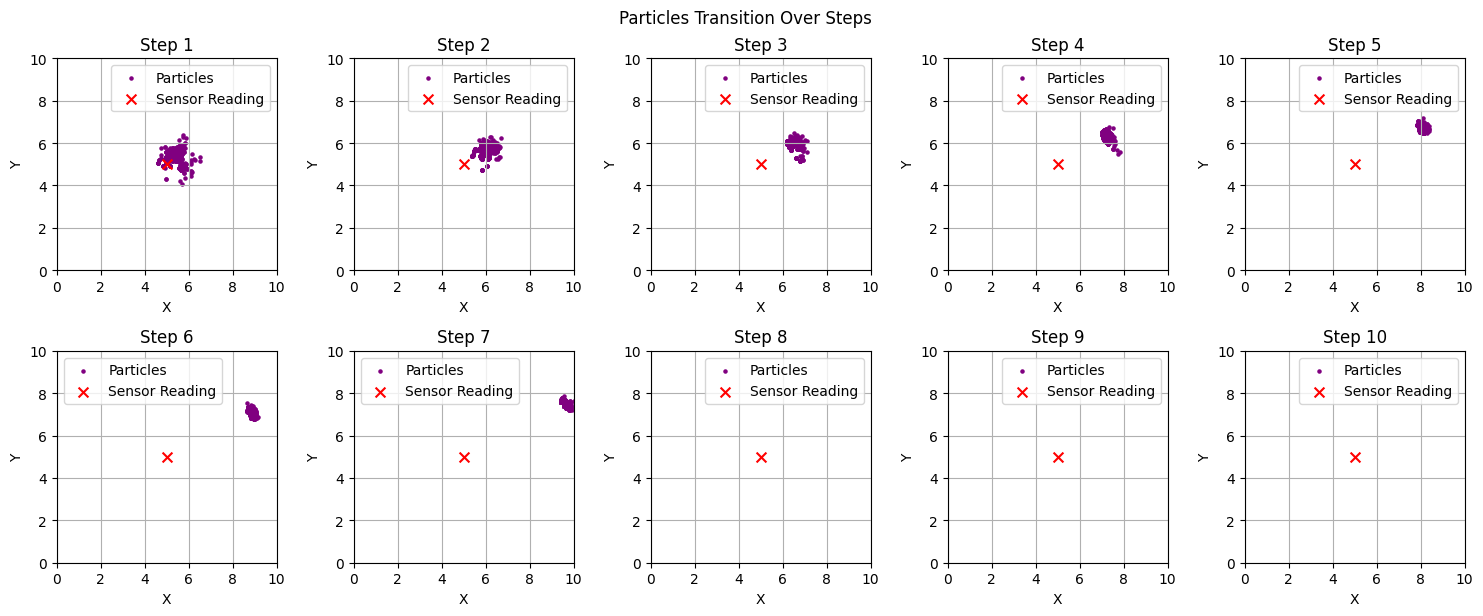

In [16]:
# Number of iterations (time steps)
n_steps = 10

# Create a single figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten the axes for easy indexing

# Simulate robot motion at each step
for step in range(n_steps):
    # Step 2: Prediction
    dx, dy, dtheta = 1.0, 0.5, np.pi / 18  # Robot movement
    particles = move_particles(particles, dx, dy, dtheta, motion_noise_std)

    # Step 3: Correction
    weights = calculate_weights(particles, sensor_reading, sensor_noise_std)

    # Step 4: Resampling
    particles = resample_particles(particles, weights)

    # Visualization in the subplot
    ax = axes[step]
    ax.scatter(particles[:, 0], particles[:, 1], s=5, label=f"Particles", color="purple")
    ax.scatter(sensor_reading[0], sensor_reading[1], c="red", label="Sensor Reading", marker="x", s=50)
    ax.set_title(f"Step {step+1}")
    ax.set_xlim(0, room_x)
    ax.set_ylim(0, room_y)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Particles Transition Over Steps", y=1.02)
plt.show()



### **What You’ll Observe**
- **Step-by-Step Convergence**:
   - At each step, particles will become increasingly concentrated around the robot’s true position as corrections refine the estimate.

- **Adaptation to New Data**:
   - As new motion and sensor data are incorporated, the algorithm continuously updates its belief about the robot's position.

---

### **When to Stop Repeating?**
1. **Localization Accuracy**:
   - If the particles are tightly clustered around a position and match the sensor data well, the localization task may be considered complete.

2. **End of Task**:
   - If the robot completes its navigation task (e.g., reaches its destination), the localization process can stop.


##### **What You Can Observe in the Plot**

The plot shows the **transition of particles** over 10 steps in the Monte Carlo Localization (MCL) process. Here's how you can interpret the progression:

---

##### **Step-by-Step Analysis**
1. **Step 1 (Initialization)**:
   - Particles are initially distributed randomly around the room.
   - The red "X" marks the **sensor reading**, which represents the robot's position as estimated by the sensor.
   - The particles are spread widely since the algorithm hasn't yet corrected their positions based on sensor data.

2. **Steps 2 to 4 (Prediction and Correction)**:
   - As the robot moves, particles are updated (predicted) based on the motion model.
   - After each prediction, the particles are **corrected** using the sensor reading.
   - You can see the particles beginning to cluster closer to the sensor reading, representing improved localization.

3. **Steps 5 to 7 (Refinement)**:
   - With each subsequent step, the particles cluster more tightly around the sensor reading.
   - The resampling step ensures that particles far from the sensor reading (low probability) are removed and replaced with particles closer to the estimated position.

4. **Steps 8 to 10 (Convergence)**:
   - By step 10, most particles are concentrated tightly around the sensor reading.
   - This shows that the algorithm has successfully localized the robot, as the particles now closely represent the robot's estimated position.

---

##### **Key Takeaways**
1. **Convergence**:
   - The algorithm starts with high uncertainty (wide spread of particles) and progressively reduces this uncertainty (particles cluster around the sensor reading).
   - This reflects the refinement of the robot’s position estimate over time.

2. **Dynamic Adjustment**:
   - The transition demonstrates the feedback loop of prediction, correction, and resampling.
   - As the robot moves and new sensor data is incorporated, the algorithm dynamically adjusts the position estimate.

3. **Importance of Sensor Data**:
   - The red "X" serves as the anchor for the particle correction process.
   - The effectiveness of the algorithm depends on accurate and reliable sensor data.

---

##### **How to Use This Information**
1. **Localization Success**:
   - The tight clustering of particles around the sensor reading in later steps indicates successful localization.

2. **Room for Improvement**:
   - If particles don't cluster well or remain scattered, it could indicate issues with:
     - The sensor model (e.g., noisy or inaccurate sensor data).
     - The motion model (e.g., unrealistic noise parameters).

3. **Testing Robustness**:
   - You can introduce more noise or simulate complex environments to test the algorithm’s robustness.

---



### **Why Particles Seem to Disappear**
1. **Convergence During Resampling**:
   - As the algorithm progresses, particles with low weights are eliminated during the **resampling step**, and only particles near the most likely position (sensor reading) remain.
   - This causes particles to cluster very tightly around the sensor reading in later steps, which might make it seem like particles are "disappearing."

2. **Plot Scale and Particle Density**:
   - In later steps, as particles converge to a small region, their tight clustering might make them less visible, especially if they overlap.
   - The fixed axes range (from 0 to 10) may exaggerate this effect, as most particles are confined to a tiny portion of the plot.

3. **Number of Particles After Resampling**:
   - If weights are incorrectly normalized or if some particles have extremely high weights, resampling might lead to a small effective number of particles.


### Addressing the above issue

---
---
---

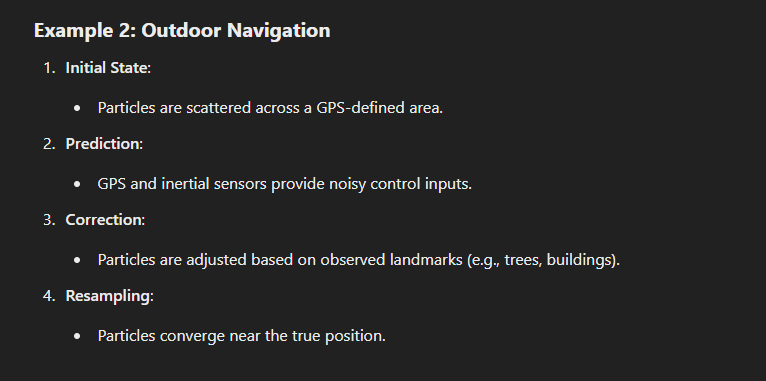

# 13. Implementation Tips


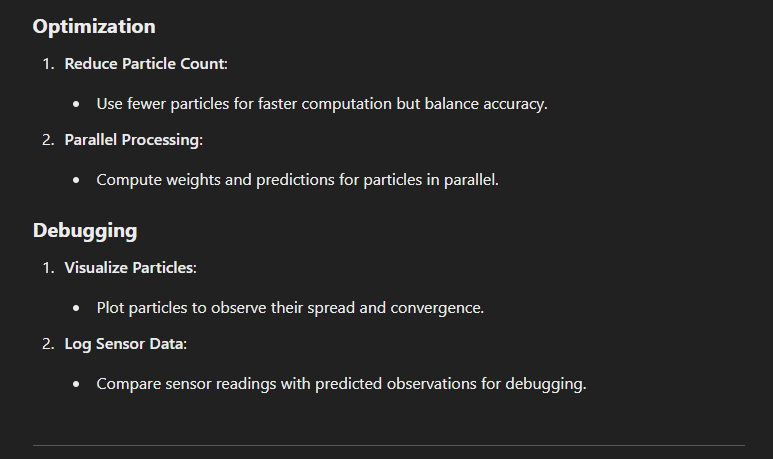